<a href="https://colab.research.google.com/github/nazirumar/CNN-Projects-Deep-Learning/blob/main/Face_With_Mask_And_without_Mask__Problem_solve_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import The require Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import cv2
import os
import random
import numpy as np

In [ ]:
!unrar x "/content/drive/MyDrive/Colab Notebooks/Mask/Mask_no_Mask.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/Mask/Mask_no_Mask.rar


Would you like to replace the existing file Mask_no_Mask/test/without_mask/without_mask (1874).png
 32156 bytes, modified on 2022-01-12 15:48
with a new one
 32156 bytes, modified on 2022-01-12 15:48

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit q

Program aborted


# Load The Data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train = "/content/Mask_no_Mask/train"
val = "/content/Mask_no_Mask/test"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = ['with_mask', 'without_mask']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Now we can easily fetch our train and validation data.


In [ ]:
train = get_data('/content/Mask_no_Mask/train')
val = get_data('/content/Mask_no_Mask/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


'NoneType' object is not subscriptable


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


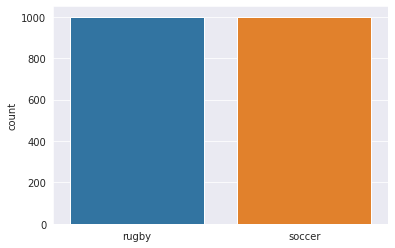

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("rugby")
    else:
        l.append("soccer")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'with_mask')

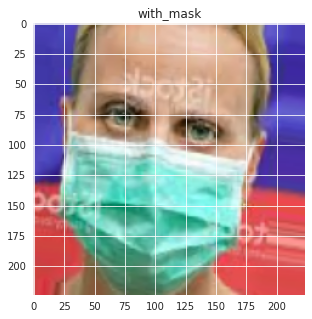

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'without_mask')

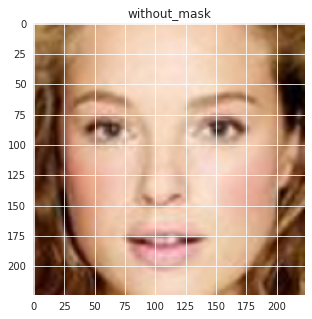

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,epochs = 100 , steps_per_epoch=10, validation_data = (x_val, y_val))


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 129s 13s/step - loss: 0.3821 - accuracy: 0.8365 - val_loss: 0.1789 - val_accuracy: 0.9459
Epoch 2/100
10/10 [==============================] - 145s 15s/step - loss: 0.1554 - accuracy: 0.9505 - val_loss: 0.1248 - val_accuracy: 0.9545
Epoch 3/100
10/10 [==============================] - 151s 16s/step - loss: 0.1126 - accuracy: 0.9555 - val_loss: 0.1041 - val_accuracy: 0.9620
Epoch 4/100
10/10 [==============================] - 149s 16s/step - loss: 0.0942 - accuracy: 0.9665 - val_loss: 0.0964 - val_accuracy: 0.9620
Epoch 5/100
10/10 [==============================] - 148s 16s/step - loss: 0.0843 - accuracy: 0.9685 - val_loss: 0.0908 - val_accuracy: 0.9661
Epoch 6/100
10/10 [==============================] - 144s 15s/step - loss: 0.0716 - accuracy: 0.9740 - val_loss: 0.0866 - val_accuracy: 0.9676
Epoch 7/100
10/10 [==============================] - 137s 15s/step - loss: 0.0648 - accuracy: 0.9785 - val_loss: 0.0835 - val_accuracy: 0.9709
Epoch 8/100

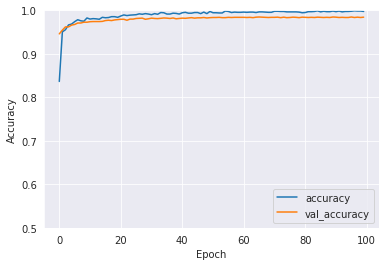

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
model.save('mask-pred.h5')

In [ ]:
pred = model.predict()

In [26]:
x_val.shape

(2682, 224, 224, 3)

In [27]:
y_val.shape

(2682,)

In [1]:
predictions = model.predict(x_val)
predictions = predictions.reshape(-1,1)[0]
print(classification_report(y_val, predictions, target_names = ['with_mask (Class 0)','without_mask (Class 1)']))

NameError: ignored

In [23]:
model.evaluate(x_val, y_val, verbose=2)

84/84 - 85s - loss: 0.0416 - accuracy: 0.9843 - 85s/epoch - 1s/step


[0.041613806039094925, 0.9843400716781616]

In [ ]:
model2 =